In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import svm, datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target

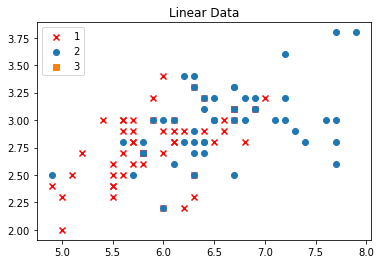

In [3]:
plt.scatter(X[Y==1,0],X[Y==1,1],marker='x',c='r',label='1')
plt.scatter(X[Y==2,0],X[Y==2,1],marker='o',label='2')
plt.scatter(X[Y==3,0],X[Y==3,1],marker='s',label='3')

plt.legend(loc='best')
plt.title('Linear Data')

plt.savefig("LinearData.png")
  
plt.show()

Spliting the data 

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)

X_train_new=scaler.transform(X_train)
X_test_new=scaler.transform(X_test)


I have created a decision boundary function to plot the decision boundary

In [6]:
def decision_boundary(X,y,model,res,test_idx=None):
    
    markers=['s','o','x']
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap=ListedColormap(colors[:len(np.unique(y))])
    
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    
    z=model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)
    
    plt.pcolormesh(xx,yy,zz,cmap=colormap)
#     plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)

## SVM

We have tried the hard-SVC by taking a very large value of 'C'

In [7]:
from sklearn.svm import SVC

model=SVC(C=10**10)
model.fit(X_train,y_train)

SVC(C=10000000000)

In [132]:
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

In [9]:
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Z = Z.reshape(xx.shape)
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')

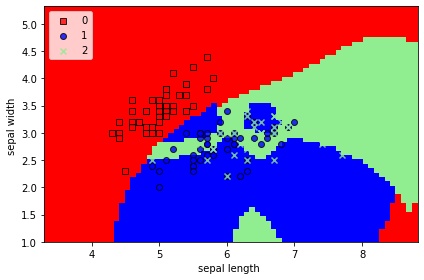

In [9]:
decision_boundary(np.vstack((X_train,X_test)),np.hstack((y_train,y_test)),model,0.08,test_idx=None)
plt.xlabel('sepal length ')
plt.ylabel('sepal width ')
plt.legend(loc='upper left')
plt.tight_layout()

plt.savefig("Hard_SVM.png")
  
plt.show()

I have tested with the Soft SVC as well by choosing a very low value of 'C'

In [10]:
model_1=SVC(kernel='linear', C=100, random_state=1)
model_1.fit(X_train_new,y_train)

SVC(C=100, kernel='linear', random_state=1)

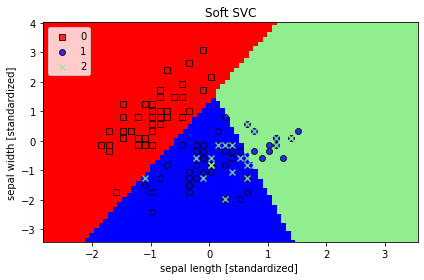

In [11]:
decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model_1,0.08,test_idx=None)
plt.xlabel('sepal length [standardized] ')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.title('Soft SVC')
plt.tight_layout()

plt.savefig("Soft_SVM.png")
  
plt.show()

Creating Sub-plots for better understanding

In [12]:
def create_mesh(x,y,res=0.02):
    
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    return xx,yy


def create_contours(ax,clf,xx,yy,**parameters):
    
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    zz=z.reshape(xx.shape)
    out = ax.contourf(xx, yy, zz)
    return out

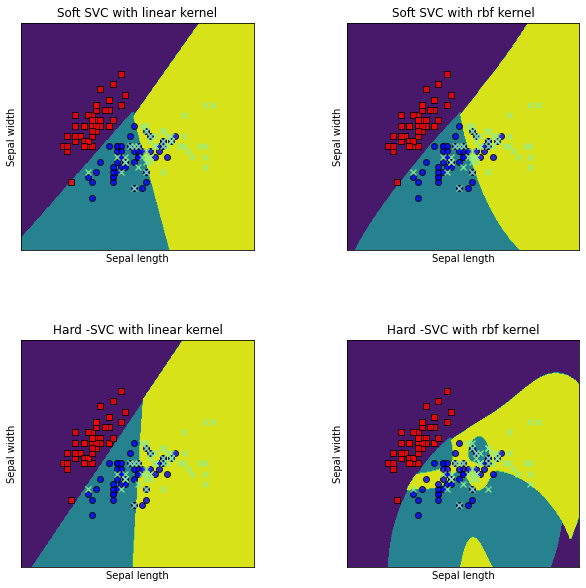

In [13]:
models = (svm.SVC(kernel='linear', C=1.0),
          svm.SVC(C=1.0),SVC(C=10**10,kernel='linear'),SVC(C=10**10,kernel='rbf'))
models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = ('Soft SVC with linear kernel',
          'Soft SVC with rbf kernel', 'Hard -SVC with linear kernel','Hard -SVC with rbf kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

xx,yy=create_mesh(X[:,0], X[:,1])

for clf, title, ax in zip(models, titles, sub.flatten()):
    
    markers=['s','o','x']
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap=ListedColormap(colors[:len(np.unique(Y))])
    
    create_contours(ax, clf, xx, yy,cmap=colormap)
    
    for idx,cl in enumerate(np.unique(Y)):
        ax.scatter(X[Y==cl,0],X[Y==cl,1],c=colors[idx],cmap=colormap, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

plt.savefig("HARD_SOFT_subplots.png")
  
plt.show()

#### Non-Linear Data

In [14]:
X_or=np.random.randn(300,2)
y_or=np.logical_xor(X_or[:,0]<0,X_or[:,1]>0)
y_or=np.where(y_or,1,-1)

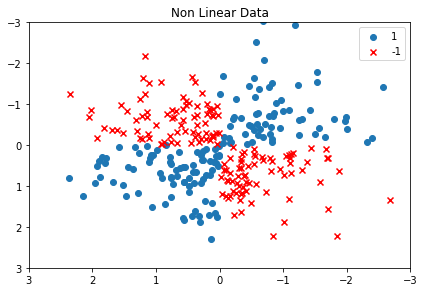

In [15]:
plt.scatter(X_or[y_or==1,0],X_or[y_or==1,1],marker='o',label='1')
plt.scatter(X_or[y_or==-1,0],X_or[y_or==-1,1],marker='x',label='-1',c='r')


plt.xlim([3,-3])
plt.ylim([3,-3])
plt.tight_layout()
plt.title('Non Linear Data')
plt.legend()

plt.savefig("Non-Linear_data.png")
  
plt.show()

In [16]:
non_linear_model=SVC(kernel='rbf',C=1.0)
non_linear_model.fit(X_or,y_or)

SVC()

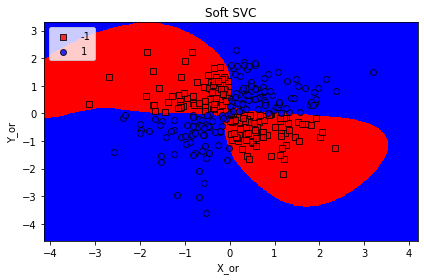

In [17]:
decision_boundary(X_or,y_or,non_linear_model,0.02,test_idx=None)
plt.xlabel('X_or  ')
plt.ylabel('Y_or')
plt.legend(loc='upper left')
plt.title('Soft SVC')
plt.tight_layout()

plt.savefig("Non-Linear_Soft_SVM.png")
  
plt.show()

In [18]:
linear_nodel=SVC(C=1.0, kernel='linear')
linear_nodel.fit(X_or,y_or)

SVC(kernel='linear')

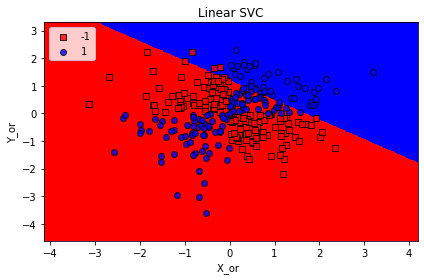

In [19]:
decision_boundary(X_or,y_or,linear_nodel,0.02,test_idx=None)
plt.xlabel('X_or  ')
plt.ylabel('Y_or')
plt.legend(loc='upper left')
plt.title('Linear SVC')
plt.tight_layout()

plt.savefig("Linear_SVM_on_non_linear_data.png")
  
plt.show()

As we can see that the linear kernel of SVC is not able to create a decision boundary for non-linear data

In [20]:
## Testing with the gamma values with non-linear data

non_linear_model=SVC(kernel='rbf',C=10.0,gamma=20.0)
non_linear_model.fit(X_or,y_or)

non_linear_model.score(X_or,y_or)

0.9933333333333333

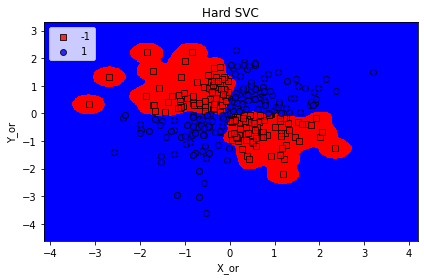

In [21]:
decision_boundary(X_or,y_or,non_linear_model,0.02,test_idx=None)
plt.xlabel('X_or  ')
plt.ylabel('Y_or')
plt.legend(loc='upper left')
plt.title('Hard SVC')
plt.tight_layout()

plt.savefig("Hard_SVM_non_linear_data_gamma.png")
  
plt.show()

In [22]:
non_linear_model=SVC(kernel='rbf',C=10.0,gamma=0.02)
non_linear_model.fit(X_or,y_or)

non_linear_model.score(X_or,y_or)

0.7866666666666666

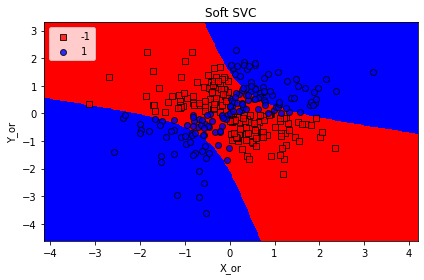

In [24]:
decision_boundary(X_or,y_or,non_linear_model,0.02,test_idx=None)
plt.xlabel('X_or')
plt.ylabel('Y_or')
plt.legend(loc='upper left')
plt.title('Soft SVC')
plt.tight_layout()

plt.savefig("Hard_SVM_non_linear_data_small_gamma.png")
  
plt.show()

As from the above figures we can see that when we increase the value of Gamma the decision boundary becomes non-linear and leads to over-fitting

It is generally preferred to keep Gamma value small in order to have a more 'Generalized Model'.

In [25]:
## Trying gamma values for Linear-data

model=SVC(kernel='linear', C=1.0, random_state=1,gamma=0.2)
model.fit(X_train_new,y_train)

model.score(X_test_new,y_test)

0.8

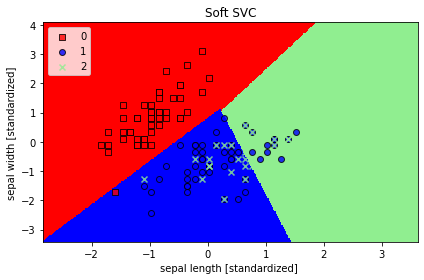

In [26]:
decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model,0.02,test_idx=None)
plt.xlabel('sepal length [standardized] ')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.title('Soft SVC')
plt.tight_layout()

plt.savefig("Soft_SVM_linear_data_small_gamma.png")
  
plt.show()

In [27]:
model=SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
model.fit(X_train_new,y_train)

model.score(X_test_new,y_test)

0.8

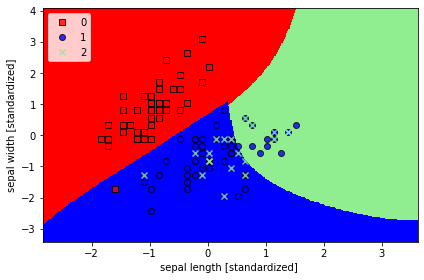

In [28]:
decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model,0.02,test_idx=None)
plt.xlabel('sepal length [standardized] ')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
# plt.title('Hard SVC')
plt.tight_layout()

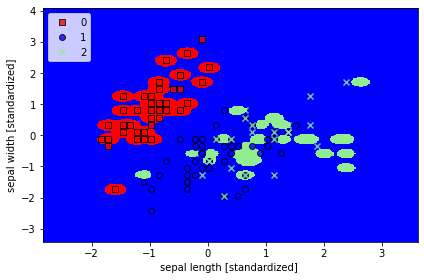

In [29]:
model = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
model.fit(X_train_new,y_train)


decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model,0.02,test_idx=None)
plt.xlabel('sepal length [standardized] ')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
# plt.title('Hard SVC')
plt.tight_layout()

plt.savefig("high_gamma.png")
  
plt.show()

### Refrences

- https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py

- https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

- https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb